In [39]:
#load the package
import pandas as pd
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
cgn = pd.read_csv('cgn.csv')

C:\Users\a\Anaconda3\envs\cusplondon\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [41]:
shape=gpd.read_file('http://data.dft.gov.uk/road-traffic/major-roads-link-network2019.zip')

In [42]:
cg_road = pd.merge(cgn, shape, left_on = 'Road Name', right_on = 'RoadNumber', how = 'left')

In [43]:
cg_road = gpd.GeoDataFrame(cg_road)

In [44]:
cg_road['sum']=cg_road['2020'] - cg_road['2019']
cg_lon = gpd.sjoin(cg_road, boros, op='within')

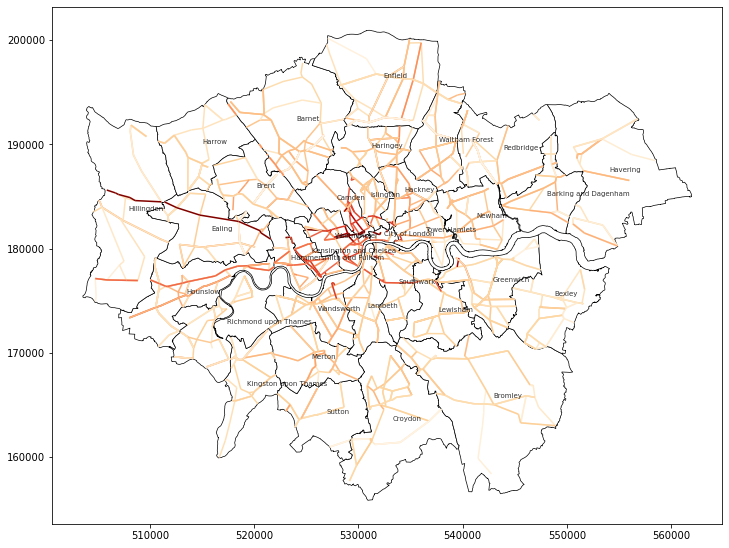

In [45]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='2019', cmap='OrRd')
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

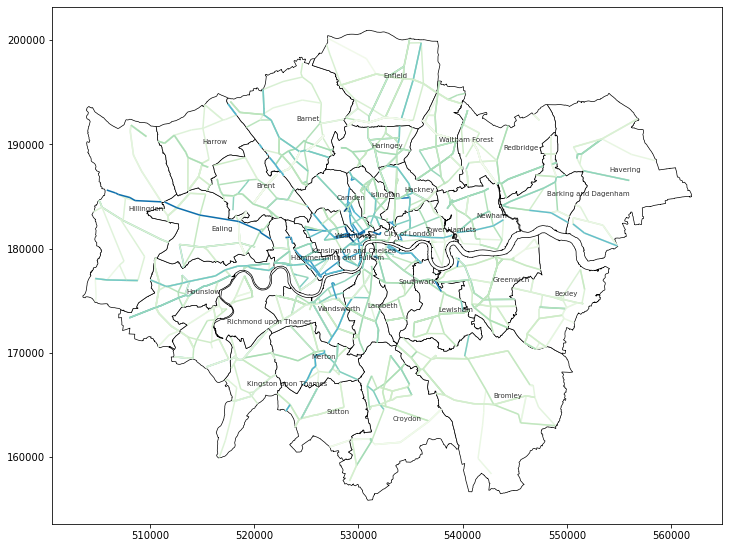

In [46]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='2020', cmap='GnBu')
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

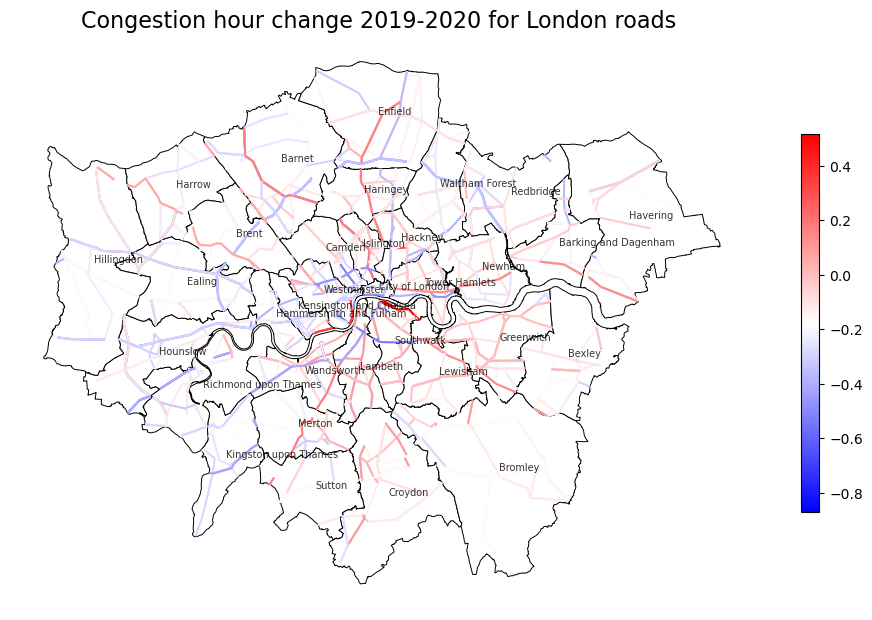

In [47]:
fig, axes = plt.subplots(1,1, figsize=(12,10),dpi = 100)
axes.axis('off')
axes.set_title("Congestion hour change 2019-2020 for London roads ", fontdict={'fontsize':'16', 'fontweight':'3'}) 
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='change%', cmap='bwr', legend=True, legend_kwds={'shrink': 0.5})
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)
plt.savefig("Congestion hour change 2019-2020 for London roads.jpg",dpi=100, bbox_inches = 'tight')

In [48]:
bg = pd.merge(boros, cg_lon.groupby("GSS_CODE").agg({'sum':'sum','2019':'sum'}), left_on='GSS_CODE', right_on='GSS_CODE', how='left')

In [49]:
bg['rate']=bg['sum'] / bg['2019']

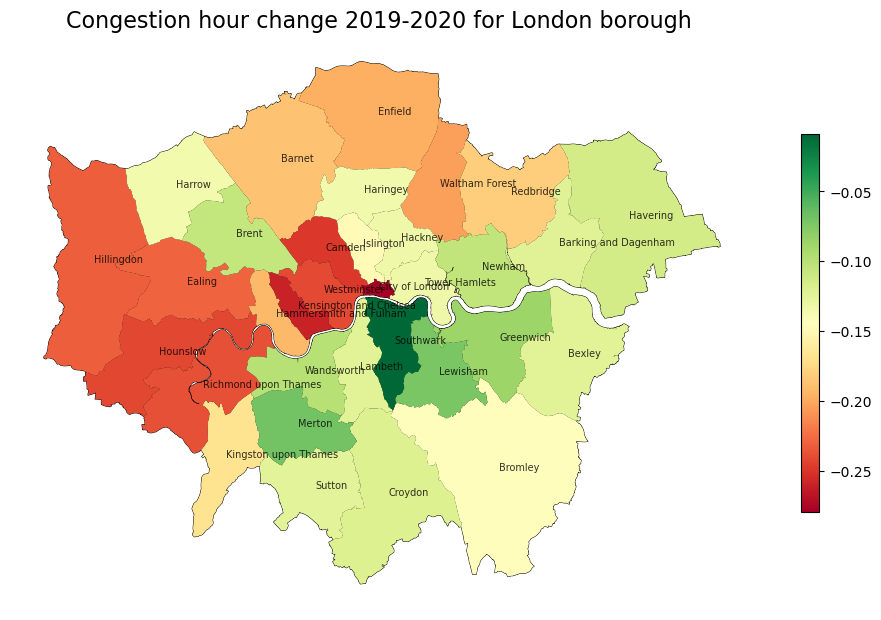

In [50]:
fig, axes = plt.subplots(1,1, figsize=(12,10),dpi = 100)
axes.axis('off')
axes.set_title("Congestion hour change 2019-2020 for London borough ", fontdict={'fontsize':'16', 'fontweight':'3'}) 
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
bg.plot(ax=axes, column='rate', cmap='RdYlGn', legend=True, legend_kwds={'shrink': 0.5})
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)
plt.savefig("Congestion hour change 2019-2020 for London borough.jpg",dpi=100, bbox_inches = 'tight')

### Income analysis

In [51]:
in_19w= pd.read_csv('ashe1.csv')
in_20w= pd.read_csv('ashe2.csv')

In [52]:
in_19w = pd.merge(in_19w, boros, left_on = 'code', right_on = 'GSS_CODE', how = 'left')
in_19w = gpd.GeoDataFrame(in_19w)

In [60]:
in_20w['change'] = in_20w['income2020'] - in_19w['income2019']
in_20w['change%'] = in_20w['change'] / in_20w['income2020']
in_20w['changehour'] = in_20w['hour2020'] - in_19w['hour2019']
in_20w['changehour%'] = in_20w['changehour'] / in_20w['hour2020']
in_20w = pd.merge(in_20w, boros, left_on = 'administrative-geography', right_on = 'GSS_CODE', how = 'left')
in_20w = gpd.GeoDataFrame(in_20w)

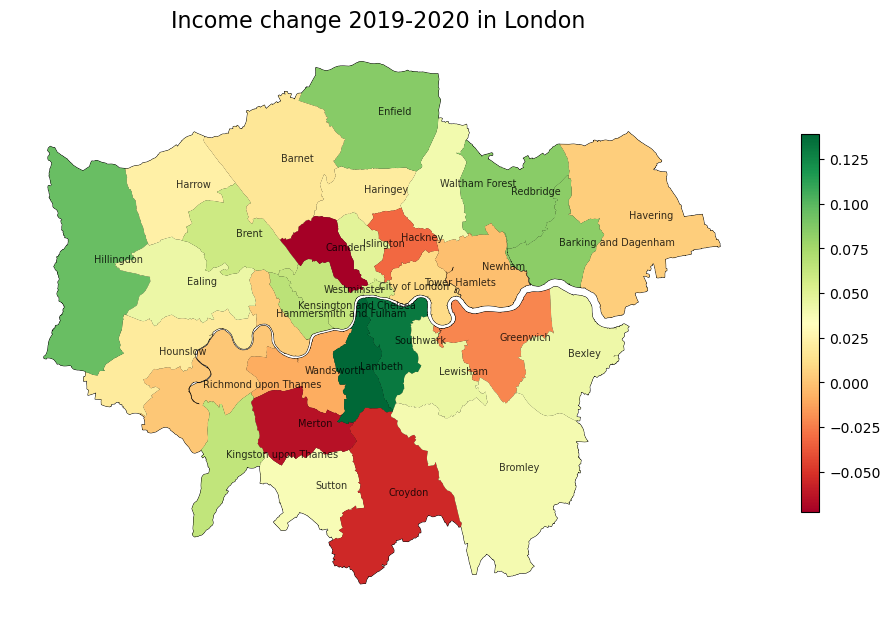

In [61]:

fig, axes = plt.subplots(1,1, figsize=(12,10),dpi=100)

axes.axis('off')
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
in_20w.plot(ax=axes, column='change%', cmap='RdYlGn', legend=True, legend_kwds={'shrink': 0.5})
axes.set_title("Income change 2019-2020 in London ", fontdict={'fontsize':'16', 'fontweight':'3'}) 
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)
plt.savefig("Income change 2019-2020 in London.jpg",dpi=100, bbox_inches = 'tight')

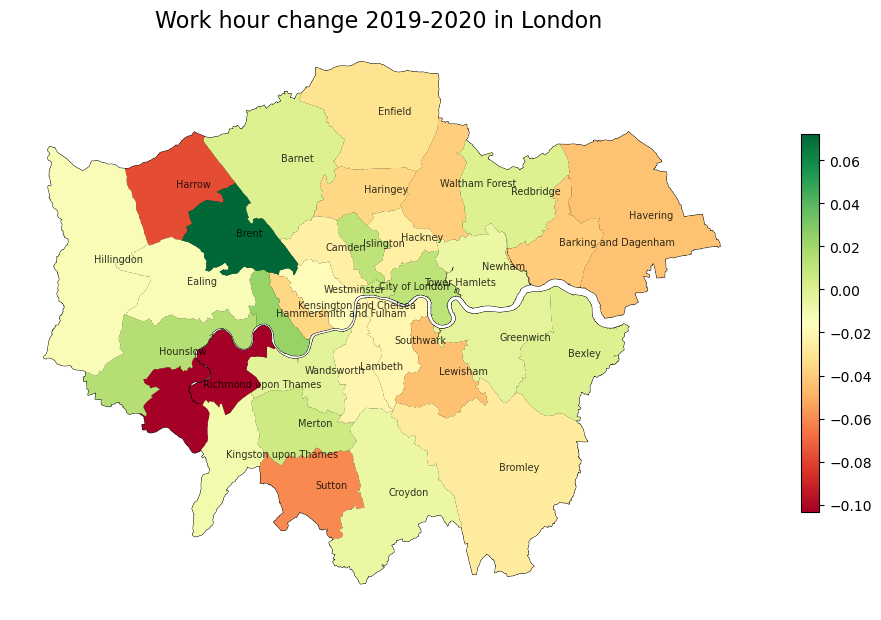

In [62]:
fig, axes = plt.subplots(1,1, figsize=(12,10),dpi = 100)
axes.axis('off')
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
in_20w.plot(ax=axes, column='changehour%', cmap='RdYlGn', legend=True, legend_kwds={'shrink': 0.5})
axes.set_title("Work hour change 2019-2020 in London ", fontdict={'fontsize':'16', 'fontweight':'3'}) 
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)
plt.savefig("Work hour change 2019-2020 in London.jpg",dpi=100, bbox_inches = 'tight')

In [63]:
in_19r= pd.read_csv('2019 residence.csv')
in_20r= pd.read_csv('2020 residence.csv')

In [64]:
in_20r['changehour'] = in_20r['2020 hour'] - in_19r['2019 hour']
in_20r['change'] = in_20r['2020 income'] - in_19r['2019income']
in_20r = pd.merge(in_20r, boros, left_on = 'administrative-geography', right_on = 'GSS_CODE', how = 'left')
in_20r = gpd.GeoDataFrame(in_20r)

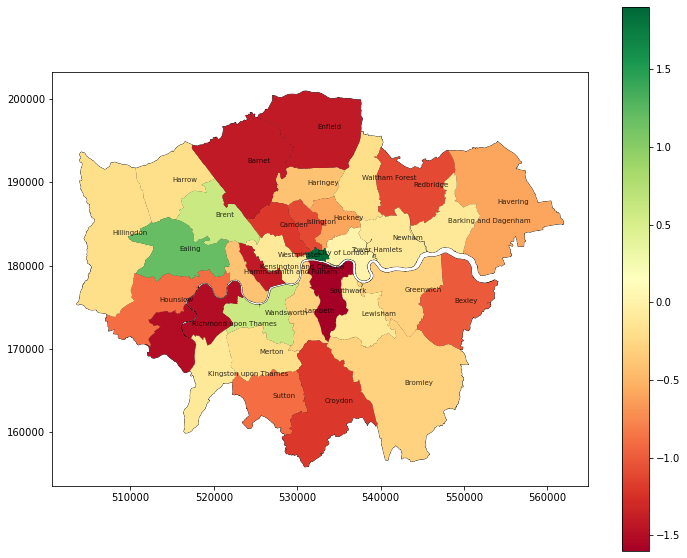

In [65]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
in_20r.plot(ax=axes, column='changehour', cmap='RdYlGn', legend=True)
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

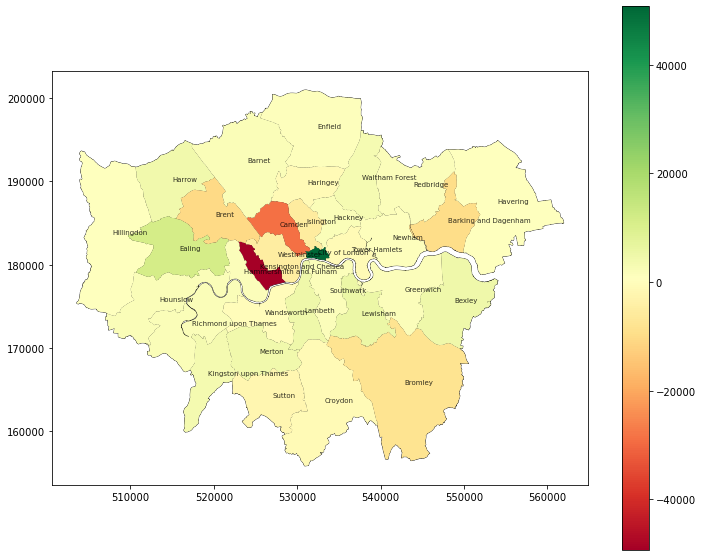

In [66]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
in_20r.plot(ax=axes, column='change', cmap='RdYlGn', legend=True)
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)